> <h1 style="background-color:Moccasin;"></br><center>Predicting Defensive Player of the Year in the NFL<br><br>
   Project Author : Shawn Smith </br></h1>

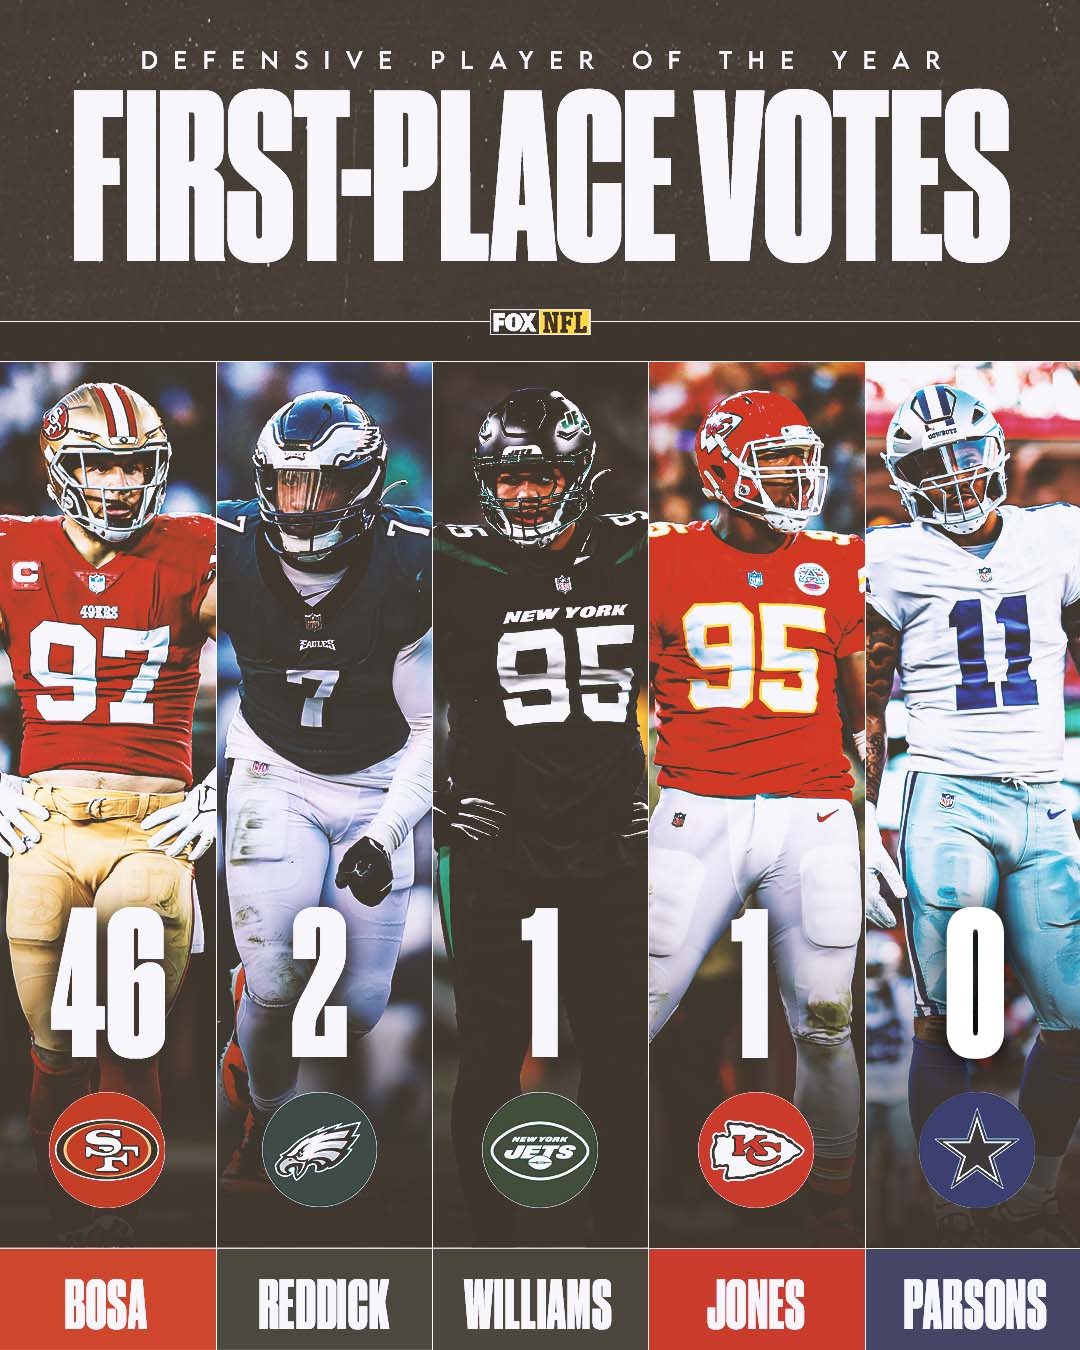\

<font size = "6">Purpose: <br>
    To accurately predict the Defensive Player of the Year in the NFL.

<h1 style="background-color:LightGrey;"><font size = "6"></br>Executive Summary: <br><br> 
    <font size = "4"><p style="text-indent: 40px">
  - Acquire and Prepare<br><p style="text-indent: 40px">
  - Exploration<br><p style="text-indent: 40px">
  - Formula Generation & Results<br><p style="text-indent: 40px">
  - Conclusion & Summary </br></h1>


# Acquisition:

1. Data was retrieved from <span style="background-color: lime;">https://www.pro-football-reference.com/</span>
2. Retrieve the statistics necessary to determine outcome of the DPOY for the last 5 years, 2018-2022
3. 10 total data sets saved as csvs with 2 data sets/year, one being advanced defensive statistics and the other being standard statistics
4. Data was retrieved on Jan 26, 2023
5. Each row in every dataset represented a different player with each column being a statistic associated with that player

# Preparation:

1. All advanced and standard schemas had 28 and 25 columns respectively with 8 common columns
    * I removed any common columns and any columns that were too closely related to a specific position
    * After column removal, I ended up with 12 columns
2. Next, I addressed nulls by replacing them with zeros, indicating that the player did not records a statistic for that category
3. After I had the columns I needed, I created formulas to determine ratings for each of the three general defensive positional layers DL, LB and DB<br>
   <span style="background-color: lime;">* I created a new statistic called Pass Play Disruption Score, or PPDS for short</span>
    * I then created an overall defensive rating combining the ratings for each positional layer previously mentioned
4. After feature engineering and formula tinkering, I had 17 columns in all 10 datasets 
5. I then merged the pairs of yearly datasets together combining advanced and standard datasets while removing the rows I used to create new statistics
6. I then had to generalize positions based on the defensive rating columns created (i.e. MLB/OLB --> LB, FS/CB --> DB) - There were 74 different position combinations I had to consolidate down to three
7. There were also 15 non-defensive positions that ended up with defensive statistics such as  QB, K, OL to name a few that needed to be dropped
8. There were also duplicate players in dataset that were also dropped

# Prep TL:DR
- Dropped unrelated/duplicated columns
- Filled Nulls with zeros
- Developed formulas and new features
- Merged, dropped unrelated info

### Data Dictionary

| Feature|Definition|
|:------|:------|
|**Player**	| - Player's Name
|**Tm**| - Player's Team (If player was traded mid-season, team will display "2TM")
|**Pos**	|- Player's Position on Defense (categorized into DL(Defensive Lineman), LB(Linebacker), or DB(Defensive Back)
|**Int**	|- Number of Interceptions
|**Cmp%**	|- Completion Percentage allowed when targeted by opposing team
|**Sk**|- Number of times opposing QB was tackled before they threw the ball(sacks)
|**Comb**	|- Total number of Solo Tackles and Tackle assists
|**PD**	|- Number of Passes Deflected resulting in an incomplete pass
|**FF**	|- Forced Fumbles caused
|**FR**	|- Number of Fumbles Recovered
|**TFL**	|- Tackles that resulted in a loss of yardage
|**ppds**	|- Pass Play Disruption Score (combines QB hurries, QB knockdowns, QB hits, and sacks)
|**TDs**	|- Defensive TDs scored
|**DBR**	|- Defensive Back Rating
|**DLR**	|- Defensive Lineman Rating
|**LBR**	|- Linebacker Rating
|**ODR**|- Overall Defensive Rating

In [1]:
# Importing HTML capabilities
from IPython.display import HTML, display

#Importing stats for statistical testing
from scipy.stats import pearsonr, spearmanr

# Importing personal modules
import wrangle as w
import formulas_and_functions as f

<h1 style="background-color:LightSteelBlue;"></br><center>Acquire</br></h1>

In [2]:
(df_adv18, df_adv19, df_adv20, df_adv21, df_adv22, 
 df_std18, df_std19, df_std20, df_std21, df_std22) = w.any_given_sunday()

<h1 style="background-color:LightGreen;"></br><center>Prepare</br></h1>

## The following process was repeated for each year of data (2018-2022)
1. Drop excess columns
2. Create new stats
3. Cleanup by removing irrelevant info/handling nulls
4. Create ratings columns
5. Win

<h1 style="background-color:PeachPuff;"></br><font size = "5"><center>2018

In [3]:
df18 = w.transform(df_adv18, df_std18)

In [4]:
results18 = f.drumroll_please(df18, 102)

<h1 style="background-color:PeachPuff;"></br><font size = "5"><center>2019

In [5]:
df19 = w.transform(df_adv19, df_std19)

In [6]:
results19 = f.drumroll_please(df19, 98.8)

<h1 style="background-color:PeachPuff;"></br><font size = "5"><center>2020

In [7]:
df20 = w.transform(df_adv20, df_std20)

In [8]:
results20 = f.drumroll_please(df20, 86.2)

<h1 style="background-color:PeachPuff;"></br><font size = "5"><center>2021

In [9]:
df21 = w.transform(df_adv21, df_std21)

In [10]:
results21 = f.drumroll_please(df21, 99.5)

<h1 style="background-color:PeachPuff;"></br><font size = "5"><center>2022

In [11]:
df22 = w.transform(df_adv22, df_std22)

In [12]:
results22 = f.drumroll_please(df22, 95.5)

<h1 style="background-color:Orchid;"></br><center>Exploration</br></h1>

>> ### What statistics are the most important per positional grouping on defense?

| |Int	|Sk|	Comb|	PD|TFL|	ppds	|	DBR|	DLR|	LBR|	ODR|
|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|
| | | | | | | | | | | |
|Int|	1.000000|-0.111930	|0.453342|0.145509|	-0.028682|	-0.135303|	<span style="background-color: lime;">**0.804636**</span>|	0.013316	|0.537911	|0.489906|
| | | | | | | | | | | |
|Sk|	-0.111930	|	1.000000	|0.221577|	-0.045228|0.846085|	0.953570|0.053287	|<span style="background-color: yellow;">**0.929756**</span>	|0.572338	|0.659436|
| | | | | | | | | | | |
|Comb	|0.453342|	0.221577|	1.000000|0.564883|0.439335|0.198049|	<span style="background-color: lime;">**0.622556**	</span>|0.451882	|<span style="background-color: cyan;">**0.804929**</span>	|0.713959|
| | | | | | | | | | | |
|PD	|0.685347	|	-0.045228|	0.564883|	1.000000	|0.062970	|-0.070987	|	<span style="background-color: lime;">**0.943530**</span>	|0.096368	|<span style="background-color: cyan;">**0.684404**	</span>|0.630922|
| | | | | | | | | | | |
|TFL|	-0.028682|	0.846085	|0.439335	|0.062970|1.000000	|0.828632|0.149280|	<span style="background-color: yellow;">**0.892433**	</span>|<span style="background-color: cyan;">**0.644966**	</span>|0.700144|
| | | | | | | | | | | |
|ppds	|-0.135303|	0.953570	|0.198049	|-0.070987|0.828632|	1.000000|0.024853|	<span style="background-color: yellow;">**0.958802**</span>|	0.571959|	0.662487|
| | | | | | | | | | | |
|DBR	|<span style="background-color: lime;">**0.804636**</span>|	0.053287|	<span style="background-color: lime;">**0.622556**	</span>|	<span style="background-color: lime;">**0.943530**</span>	|	0.149280|	0.024853|	1.000000|	0.217336	|0.778222	|<span style="background-color: lime;">**0.742667**</span>|
| | | | | | | | | | | |
|DLR|	0.013316	|<span style="background-color: yellow;">**0.929756**</span>|0.451882	|0.096368	|<span style="background-color: yellow;">**0.892433**	</span>	|	<span style="background-color: yellow;">**0.958802**</span>|		0.217336|	1.000000|	0.749643	|<span style="background-color: yellow;">**0.812803**</span>	|
| | | | | | | | | | | |
|LBR|	0.537911|	0.572338	|<span style="background-color: cyan;">**0.804929**</span>|	<span style="background-color: cyan;">**0.684404**	</span>|<span style="background-color: cyan;">**0.644966**	</span>|0.571959	|0.778222	|0.749643|	1.000000	|<span style="background-color: cyan;">**0.986063**</span>|
| | | | | | | | | | | |
|ODR	|0.489906	|0.659436|	0.713959|	0.630922	|	0.700144	|0.662487|		<span style="background-color: lime;">**0.742667**</span>|	<span style="background-color: yellow;">**0.812803**</span>	|<span style="background-color: cyan;">**0.986063**</span>|	1.000000|

<h1 style="background-color:Thistle;"></br><center>Defensive Back Statistic Relevance</br></h1>

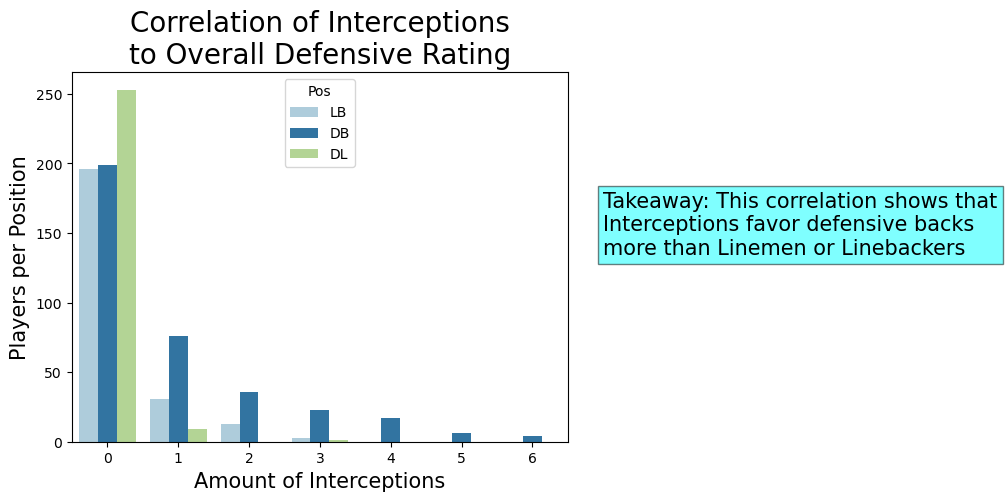

In [13]:
f.DB_stat_correlation(df22)

In [14]:
f.confirm_statistical_correlation(df22, df22.DBR, df22.Int)

There is a strong positive correlation with an R-value of: 0.671950899769032
P-value of: 6.209944416926535e-115


<h1 style="background-color:Thistle;"></br><center>Linebacker Statistic Relevance</br></h1>

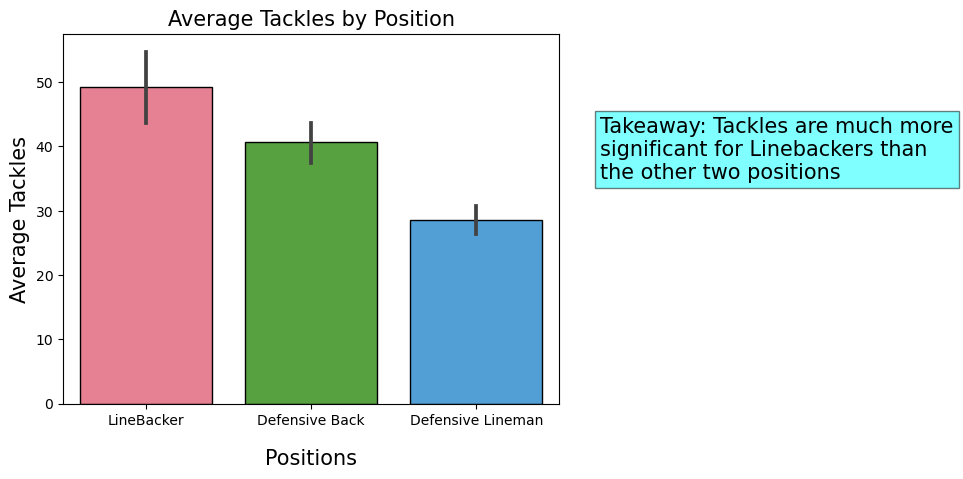

In [15]:
f.LB_tackle_correlation(df22)

In [16]:
f.confirm_statistical_correlation(df22, df22.LBR, df22.Comb)

There is a strong positive correlation with an R-value of: 0.8929492137832006
P-value of: 4.3910535421584166e-302


<h1 style="background-color:Thistle;"></br><center>Defensive Linemen Statistic Relevance</br></h1>

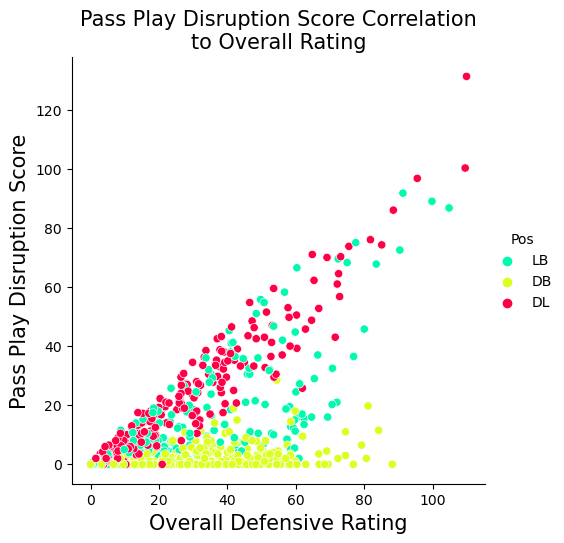

In [17]:
f.DL_stat_correlation(df22)

In [18]:
f.confirm_statistical_correlation(df22, df22.DLR, df22.ppds)

There is a strong positive correlation with an R-value of: 0.8463077314077939
P-value of: 8.111427008610922e-239


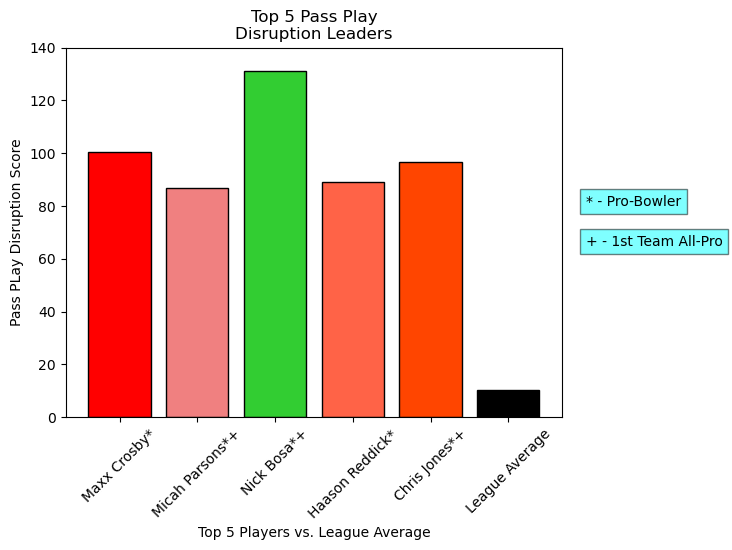

In [19]:
f.ppds_top_5(results22)

|Year|DPOY|PPDS Rank|Gap|
|-|-|-|-|
|2018|Aaron Donald|1st|33|
|2019|Stephon Gilmore|5th|1.5*|
|2020|Aaron Donald|1st|33|
|2021|T.J. Watt|1st|16|
|2022|Nick Bosa|1st|31|

|*Note||
|-|-|
||Gilmore's score was zero as a Defensive Back, but the gap between 1st and 2nd for 2019 was 1.5|

<h1 style="background-color:Gold;"></br><center>Formula Generation</br></h1>

# Reasoning
### *** Due to the nature of the data and the project, modeling was not appropriate. In lieu of modeling, I generated formulas that would capture the result I desired. ***

* For a very long time, quarterback was the only position that was given an efficiency rating
<br><br>
* Using the formula for passer rating as a template, I started gathering stats most relevant to defensive players
<br><br>


## Passer Rating Formula

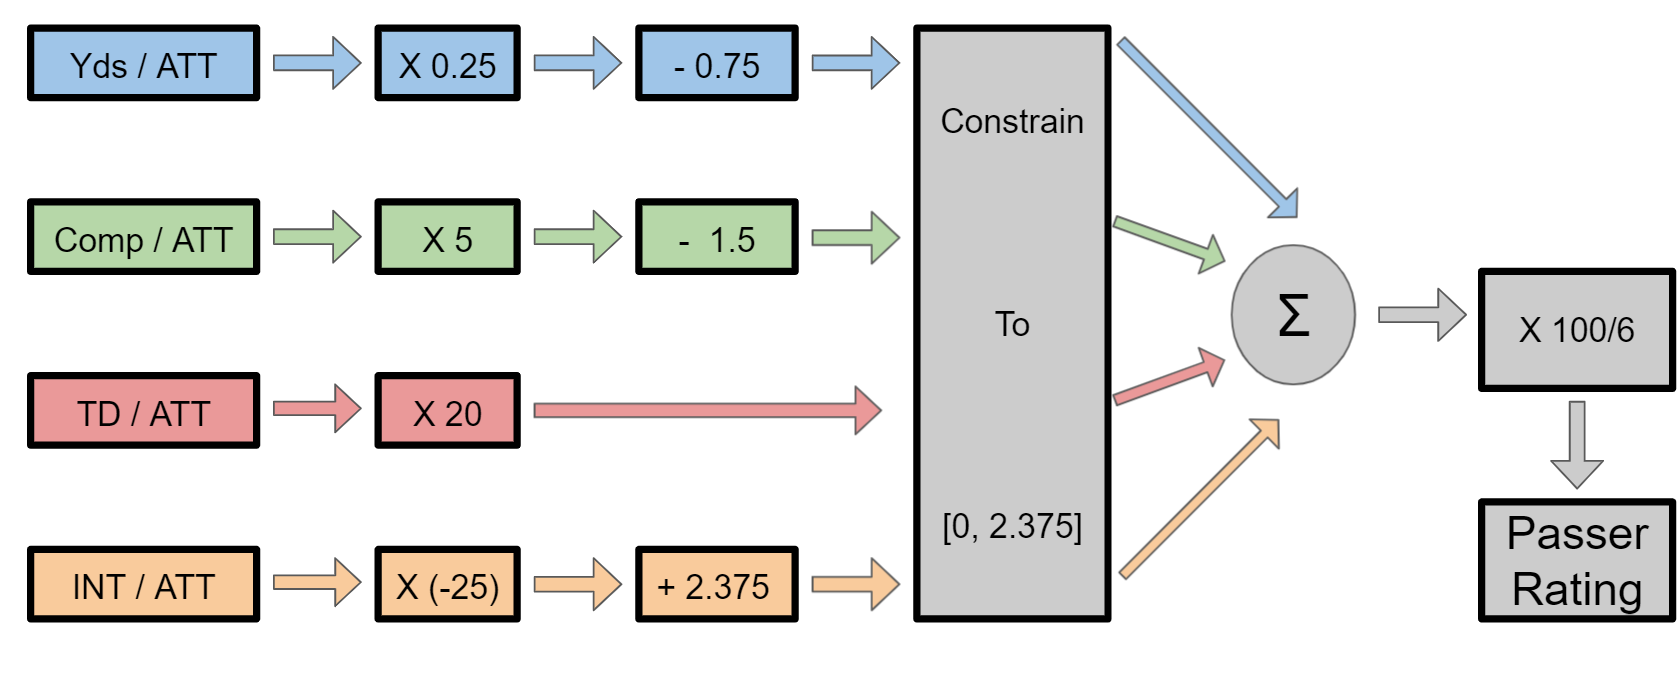

* Because the formula for passer rating weighed different statistics differently, I developed a defensive player rating that encapsulated a players performance over the course of a season based on statistics
<br><br>
* This formula got me in the right direction but needed some overhaul as I was getting decent results, but not to the expectation I was looking for

## Original Defensive Player Rating Formula: 
>> ### (Sacks x 2) + (Total tackles * 1.5) + (Interceptions * 3) * (Touchdowns * 6)

* I felt this formula favored certain positions over others so I decided to group positions by the 3 levels of a defense; Defensive Backs(DB), Defensive Linemen(DL), and Linebackers(LB)
<br><br>
* I then created formulas for those specific defensive groups that focused on their particular responsibilities on defense
<br><br>
* Combining the results for each positional group, I developed a much more refined formula for an overall defensive player rating that conceived overwhelmingly positive results

## New Formulas:

>> ## Defensive Back Rating(DBR) = 
>> ### (Int x 5) + (PD * 3.75) + (FF * 3) + (FR * 4) + (TDs * 7) * 1.5

>> ## Defensive Linemen Rating(DLR) = 
>> ### (PPDS * 1.5) + (Comb * .25) + (TFL * 1) + (FF * 1.5) + (FR * 2.5) + (TDs * 7)

>> ## Linebacker Rating(DBR) = 
>> ### (Comb x .25) + (PPDS * .5) + (Int * 2.5) + (FF * 3) + (PD * 2) + (TDs * 7)

>> ## Overall Defensive Player Rating(ODR) = 
>> ### (DBR + DLR + LBR) / 3    

<h1 style="background-color:CornFlowerBlue;"></br><center>2018 - 2022 DPOY Actual vs. Formula Predictions</br></h1>

>> ## Previous Voting Rules
>> * 50 voters with one vote each


>>> # 2018 Results

|Actual|Prediction|
|-|-|
|Aaron Donald(45)|Aaron Donald|
|Khalil Mack(5)|JJ Watt|
|No Other Votes|Khalil Mack|


>>> # 2019 Results

|Actual|Prediction|
|-|-|
|Stephon Gilmore(21)|T.J. Watt|
|Chandler Jones(14)|Shaquil Barrett|
|T.J. Watt(10)|Chandler Jones|
|Shaquil Barrett(2)|Logan Ryan|
|Aaron Donald(1)|Stephon Gilmore|
|Danielle Hunter(1)|Aaron Donald|
|Tre'Davious White(1)|Dante Fowler|

>>> # 2020 Results

|Actual|Prediction|
|-|-|
|Aaron Donald(27)|T.J. Watt|
|T.J. Watt(20)|Xavien Howard|
|Xavien Howard(3)|Aaron Donald|

>>> # 2021 Results

|Actual|Prediction|
|-|-|
|T.J. Watt(42)|T.J. Watt|
|Micah Parsons(5)|Trevon Diggs|
|Aaron Donald(3)|Myles Garrett|
|No Other Votes|J.C. Jackson|
|No Other Votes|Micah Parsons|

>> ## New Voting Rules
>> * 50 voters will vote for their top 3 players
    * 1st place vote - 5pts 
    * 2nd place vote - 3pts
    * 3rd place vote - 1pt

>>> # 2022 Results

|2022 Actual Results | |vs. Predicted Results|
|-|-|-|
|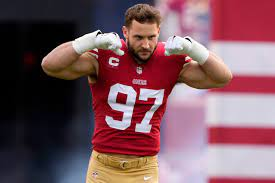 | |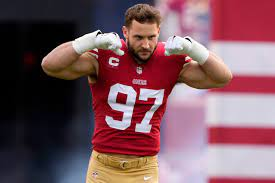|
|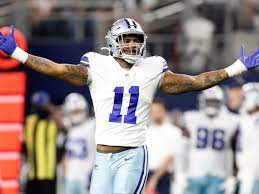| |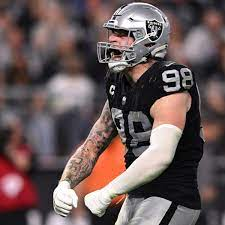|
|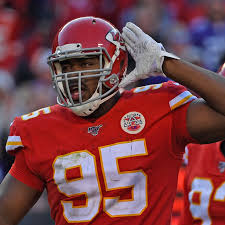| |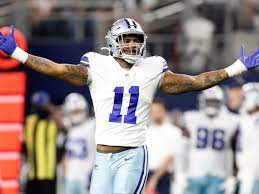|
|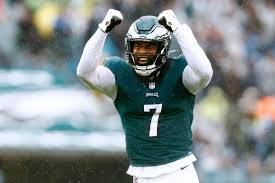| |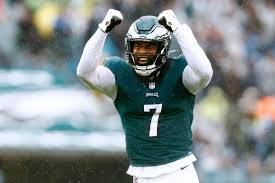|
|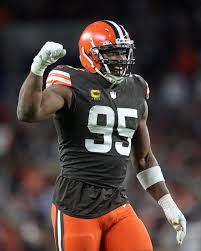| |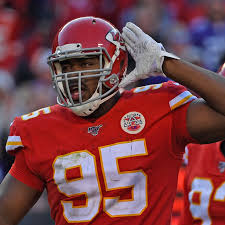|

<h1 style="background-color:Yellow;"></br><center>Conclusion</br></h1>

## My formula was able to accurately predict the DPOY in 2022 a success rate of 80%
* I was able to accurately predict the winner, and furthermore my formula listed 8 out the top 10 players that received votes
* In the previous 4 years, I predicted the winner twice, with my top 10 results capturing 84% of all players that received votes

## Recommendations
* Try to remove bias when voting for DPOY as there were times that players absolutely outshined the winners of the DPOY award but fell short of winning
* Voters should rely on the individual's impact from a statistical standpoint

## Next Steps
* Find a way to determine if the player's team success weighs on the outcome of the DPOY voting.

* Find a way to see if media attention can cause bias in voters' decision when voting